# Case Study on Supervised Learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load and explore data

In [2]:
data = pd.read_csv('heart_disease.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Using Interquartile Range (IQR) method
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("\nOutliers detected using IQR:\n", outliers_iqr)

# Using Z-score method

from scipy.stats import zscore

z_scores = np.abs(data[numerical_columns].apply(zscore))
outliers_z = (z_scores > 3).sum()
print("\nOutliers detected using Z-score:\n", outliers_z)



Outliers detected using IQR:
 age           0
sex           0
cp            0
trestbps     30
chol         16
fbs         153
restecg       0
thalach       4
exang         0
oldpeak       7
slope         0
ca           87
thal          7
target        0
dtype: int64

Outliers detected using Z-score:
 age          0
sex          0
cp           0
trestbps     7
chol        13
fbs          0
restecg      0
thalach      4
exang        0
oldpeak      7
slope        0
ca          18
thal         7
target       0
dtype: int64


In [8]:
for col in data.select_dtypes(include=['number']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Replacing high outliers with Q3
    data.loc[data[col] > upper, col] = Q3
    # Replacing low outliers with Q1
    data.loc[data[col] < lower, col] = Q1


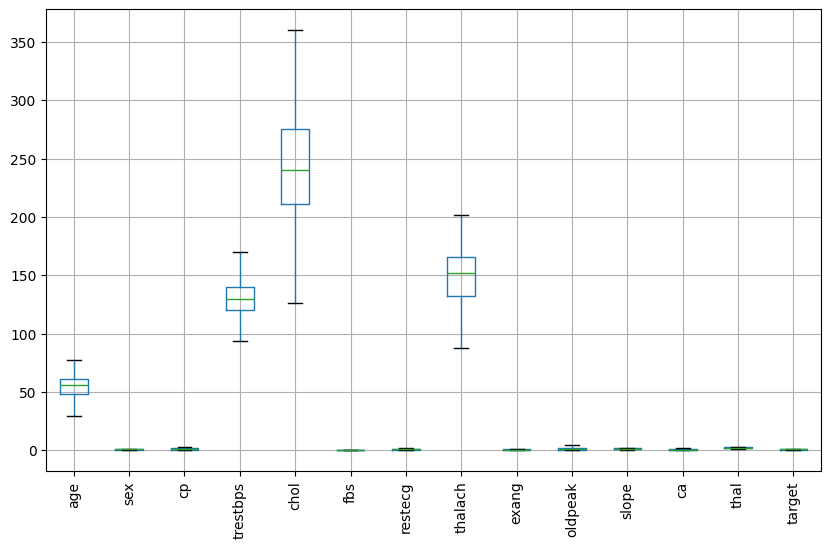

In [9]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

### Data Cleaning and Preprocessing

In [10]:
data.shape

(1025, 14)

In [11]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [12]:
for col in data.select_dtypes(include=['number']).columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Replacing high outliers with Q3
    data.loc[data[col] > upper, col] = Q3
    # Replacing low outliers with Q1
    data.loc[data[col] < lower, col] = Q1

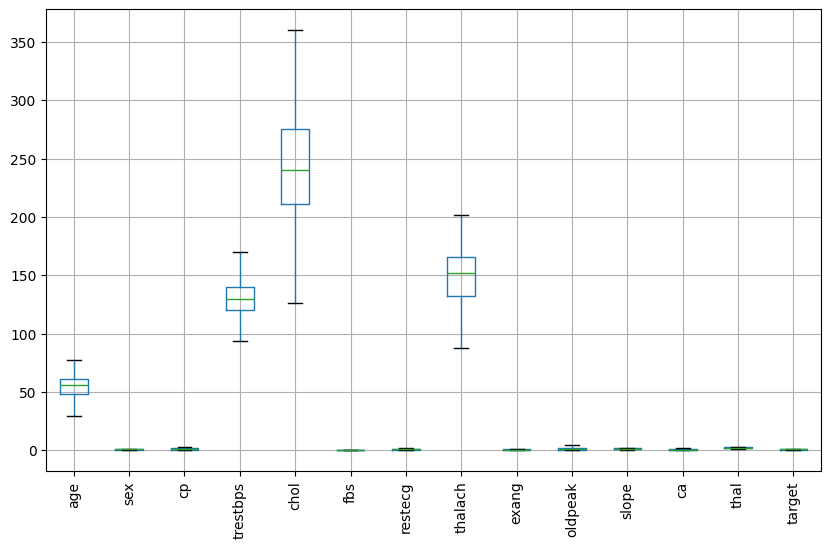

In [13]:
plt.figure(figsize=(10, 6))
data.boxplot()
plt.xticks(rotation=90)
plt.show()

In [14]:
data.shape

(1025, 14)

<Axes: xlabel='trestbps', ylabel='Count'>

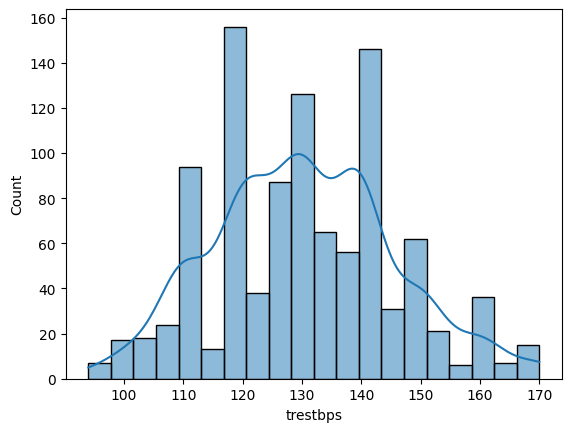

In [15]:
sns.histplot(data['trestbps'], kde=True)

<Axes: xlabel='chol', ylabel='Count'>

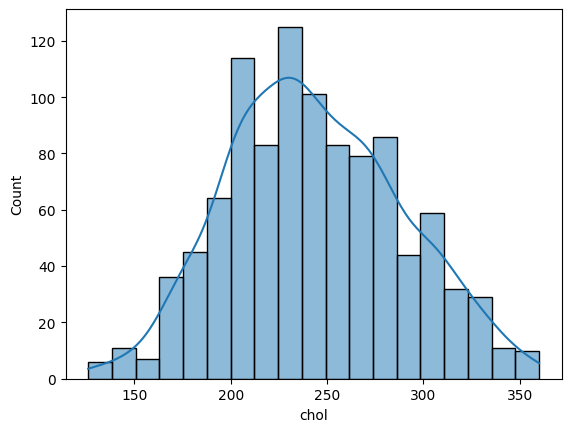

In [16]:
sns.histplot(data['chol'], kde=True)

<Axes: xlabel='thalach', ylabel='Count'>

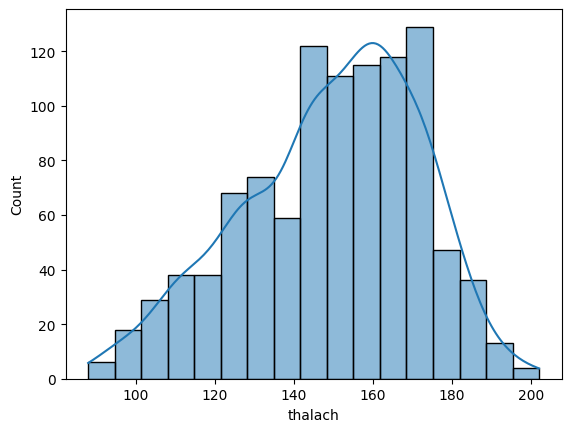

In [17]:
sns.histplot(data['thalach'], kde=True)

<Axes: xlabel='oldpeak', ylabel='Count'>

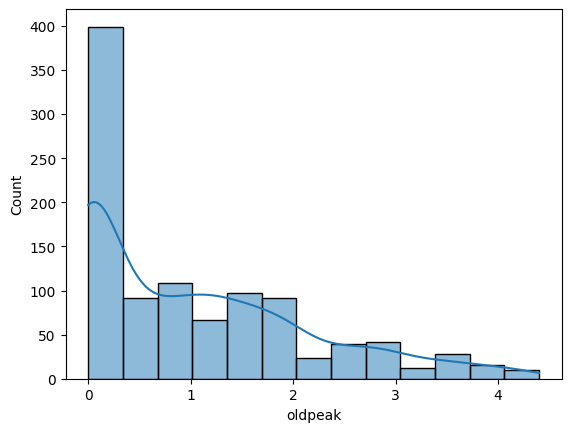

In [18]:
sns.histplot(data['oldpeak'], kde=True)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
features_to_scale = ['trestbps', 'chol', 'thalach', 'oldpeak']

In [21]:
scaler = MinMaxScaler()
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

In [22]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.407895,0.367521,0,1,0.701754,0,0.227273,2,2,3,0
1,53,1,0,0.605263,0.329060,0,0,0.587719,1,0.704545,0,0,3,0
2,70,1,0,0.671053,0.205128,0,1,0.324561,1,0.590909,0,0,3,0
3,61,1,0,0.710526,0.329060,0,1,0.640351,0,0.000000,2,1,3,0
4,62,0,0,0.578947,0.717949,0,1,0.157895,0,0.431818,1,1,2,0


### Train- Test Split

In [59]:
reg_data = data
cls_data = data

In [60]:
reg_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.407895,0.367521,0,1,0.701754,0,0.227273,2,2,3,0
1,53,1,0,0.605263,0.329060,0,0,0.587719,1,0.704545,0,0,3,0
2,70,1,0,0.671053,0.205128,0,1,0.324561,1,0.590909,0,0,3,0
3,61,1,0,0.710526,0.329060,0,1,0.640351,0,0.000000,2,1,3,0
4,62,0,0,0.578947,0.717949,0,1,0.157895,0,0.431818,1,1,2,0


In [61]:
chol=["chol"]
scaler = MinMaxScaler()
cls_data[chol] = scaler.fit_transform(cls_data[chol])

In [62]:
cls_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,0.407895,0.367521,0,1,0.701754,0,0.227273,2,2,3,0
1,53,1,0,0.605263,0.329060,0,0,0.587719,1,0.704545,0,0,3,0
2,70,1,0,0.671053,0.205128,0,1,0.324561,1,0.590909,0,0,3,0
3,61,1,0,0.710526,0.329060,0,1,0.640351,0,0.000000,2,1,3,0
4,62,0,0,0.578947,0.717949,0,1,0.157895,0,0.431818,1,1,2,0


#### Split for Regression

In [63]:
X1=reg_data.drop(columns=["chol","target"])
y1=reg_data["chol"]

In [64]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.25, random_state=42)

##### Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

In [66]:
lin_regg = LinearRegression()
lin_regg.fit(X1_train, y1_train)
y1_pred = lin_regg.predict(X1_test)

In [67]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [68]:
linregg_mse = mean_squared_error(y1_test, y1_pred)
linregg_mae = mean_absolute_error(y1_test, y1_pred)
r2_linregg = r2_score(y1_test, y1_pred)
print("Linear Regression Mean Squared Error=", linregg_mse)
print("Linear Regression Mean Absolute Error=",linregg_mae)
print("Linear Regression R-squared=", r2_linregg)

Linear Regression Mean Squared Error= 0.03663326542209223
Linear Regression Mean Absolute Error= 0.15288768043062254
Linear Regression R-squared= 0.024094973284274457


##### Decision Tree

In [69]:
from sklearn.tree import DecisionTreeRegressor
dect_regg = DecisionTreeRegressor()
dect_regg.fit(X1_train,y1_train)
y1_pred = dect_regg.predict(X1_test)

In [70]:
dectree_mse = mean_squared_error(y1_test, y1_pred)
dectree_mae = mean_absolute_error(y1_test, y1_pred)
r2_dectree = r2_score(y1_test, y1_pred)
print("Decision Tree Mean Squared Error=", dectree_mse)
print("Decision Tree Mean Absolute Error=", dectree_mae)
print("Decision Tree R-squared=", r2_dectree)

Decision Tree Mean Squared Error= 0.0009454749801951233
Decision Tree Mean Absolute Error= 0.0063354285144168465
Decision Tree R-squared= 0.9748126798095939


##### Random Forest

In [71]:
from sklearn.ensemble import RandomForestRegressor
randomf_regg = RandomForestRegressor()
randomf_regg.fit(X1_train,y1_train)

RandomForestRegressor()

In [72]:
y1_pred = rf_clf.predict(X1_test)

In [73]:
randomf_mse = mean_squared_error(y1_test, y1_pred)
randomf_mae = mean_absolute_error(y1_test, y1_pred)
r2_randomf = r2_score(y1_test, y1_pred)
print("Random Forest Regressor Mean Squared Error=", randomf_mse)
print("Random Forest Regressor Mean Absolute Error=",randomf_mae)
print("Random Forest Regressor R-squared=", r2_randomf)

Random Forest Regressor Mean Squared Error= 0.0024737832969924205
Random Forest Regressor Mean Absolute Error= 0.03475090624896071
Random Forest Regressor R-squared= 0.934098761693125


In [74]:
# Among these, decision tree is the best model

#### Split for Classification

In [75]:
X2=cls_data.drop(columns=["target"])
y2=data["target"]

In [76]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.25, random_state=42)


##### Logistic Regression

In [77]:
log_regg = LogisticRegression()
log_regg.fit(X2_train, y2_train)
y2_pred = log_regg.predict(X2_test)

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [79]:
logregg_accuracy = accuracy_score(y2_test, y2_pred)
logregg_precision = precision_score(y2_test, y2_pred)
logregg_recall= recall_score(y2_test, y2_pred)
logregg_f1 = f1_score(y2_test, y2_pred)

print(f"Logistic Regression Accuracy= {logregg_accuracy}")
print(f"Logistic Regression Precision={logregg_precision}")
print(f"Logistic Regression Recall={logregg_recall}")
print(f"Logistic Regression F1 Score={logregg_f1}")

Logistic Regression Accuracy= 0.8326848249027238
Logistic Regression Precision=0.777027027027027
Logistic Regression Recall=0.92
Logistic Regression F1 Score=0.8424908424908425


##### k-Nearest Neighbors (KNN)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X2_train, y2_train)
y2_pred = knn.predict(X2_test)

In [84]:
knn_accuracy = accuracy_score(y2_test, y2_pred)
knn_precision = precision_score(y2_test, y2_pred)
knn_recall = recall_score(y2_test, y2_pred)
knn_f1= f1_score(y2_test, y2_pred)

print(f"Accuracy of KNN ={knn_accuracy}")
print(f"Precision of KNN = {knn_precision}")
print(f"Recall of KNN = {knn_recall}")
print(f"F1 Score ={knn_f1}")

Accuracy of KNN =0.8287937743190662
Precision of KNN = 0.8648648648648649
Recall of KNN = 0.768
F1 Score =0.8135593220338984


##### Naive Bayes 

In [85]:
from sklearn.naive_bayes import GaussianNB

In [86]:
nb = GaussianNB()
nb.fit(X2_train, y2_train)
y2_pred = nb.predict(X2_test)

In [88]:
nb_accuracy = accuracy_score(y2_test, y2_pred)
nb_precision = precision_score(y2_test, y2_pred)
nb_recall = recall_score(y2_test, y2_pred)
nb_f1 = f1_score(y2_test, y2_pred)

print(f"Accuracy of Naive Bayes = {nb_accuracy}")
print(f"Precision of Naive Bayes = {nb_precision}")
print(f"Recall of Naive Bayes= {nb_recall}")
print(f"F1 Score of Naive Bayes= {nb_f1}")

Accuracy of Naive Bayes = 0.8171206225680934
Precision of Naive Bayes = 0.7746478873239436
Recall of Naive Bayes= 0.88
F1 Score of Naive Bayes= 0.8239700374531835
